In [1]:
#import libraries and read dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
dataframe =pd.read_csv("cardioActivities.csv")
dataframe.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [2]:
# Get and print the column names
columns = dataframe.columns


# Display the first few rows of the dataframe
dataframe

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,NaN,1.57,13:39,8:41,6.91,926743.0,7,NaN,NaN,NaN,2012-08-28-070657.gpx
504,2012-08-24 12:59:42,018f66a7-da5e-4985-a8fe-725a33317c87,Walking,NaN,1.48,17:56,12:09,4.94,942192.0,12,NaN,NaN,NaN,2012-08-24-125942.gpx
505,2012-08-24 10:12:16,7acec95a-d63d-435d-837c-7befb352f500,Walking,NaN,1.49,13:43,9:14,6.49,924486.0,9,NaN,NaN,NaN,2012-08-24-101216.gpx
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,NaN,NaN,NaN,2012-08-24-081312.gpx


In [3]:
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

In [4]:
print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())


                  Date                           Activity Id     Type  \
0  2018-11-11 14:05:12  c9627fed-14ac-47a2-bed3-2a2630c63c15  Running   
1  2018-11-09 15:02:35  be65818d-a801-4847-a43b-2acdf4dc70e7  Running   
2  2018-11-04 16:05:00  c09b2f92-f855-497c-b624-c196b3ef036c  Running   
3  2018-11-01 14:03:58  bc9b612d-3499-43ff-b82a-9b17b71b8a36  Running   
4  2018-10-27 17:01:36  972567b2-1b0e-437c-9e82-fef8078d6438  Running   

  Route Name  Distance (km) Duration Average Pace  Average Speed (km/h)  \
0        NaN          10.44    58:40         5:37                 10.68   
1        NaN          12.84  1:14:12         5:47                 10.39   
2        NaN          13.01  1:15:16         5:47                 10.37   
3        NaN          12.98  1:14:25         5:44                 10.47   
4        NaN          13.02  1:12:50         5:36                 10.73   

   Calories Burned  Climb (m)  Average Heart Rate (bpm)  Friend's Tagged  \
0            774.0        130     

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

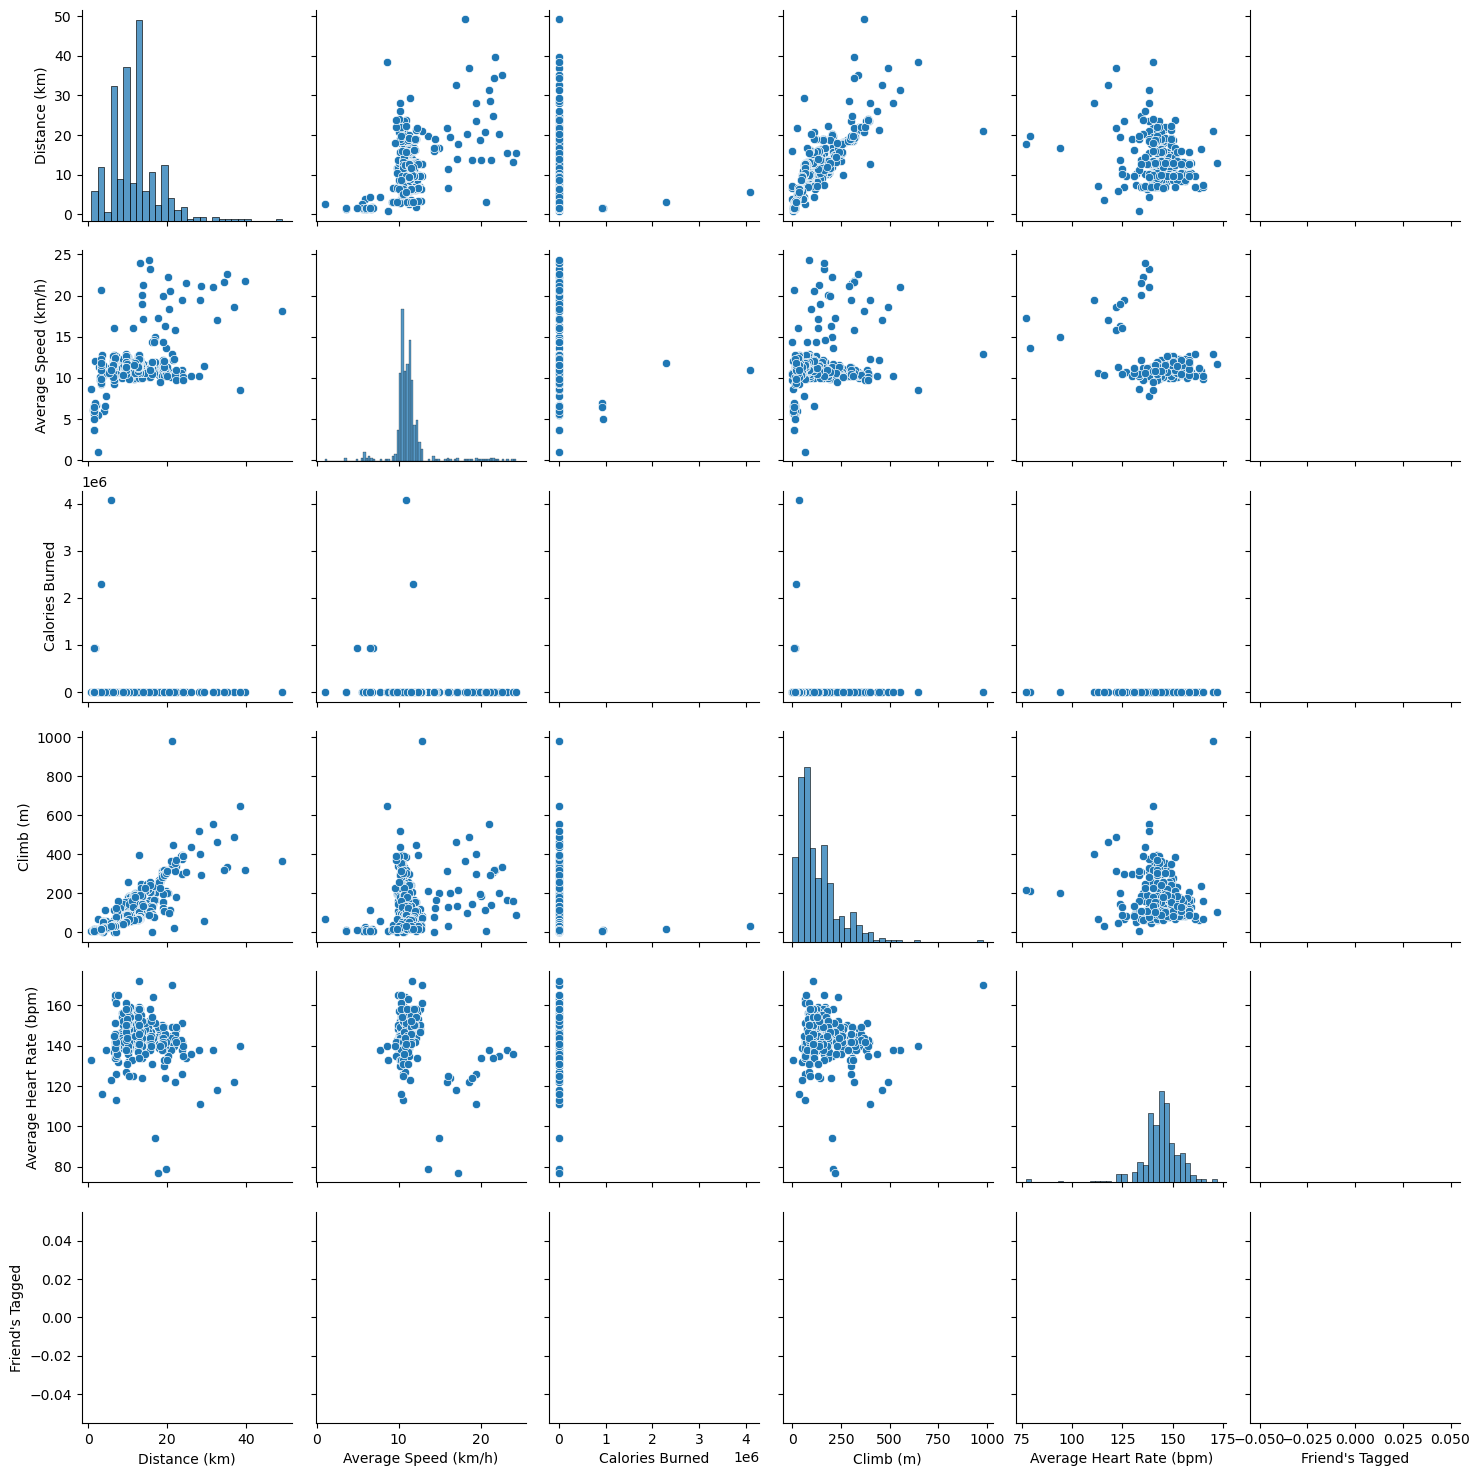

In [5]:
plt.figure(figsize=(15, 8))
sns.pairplot(dataframe)
plt.show()

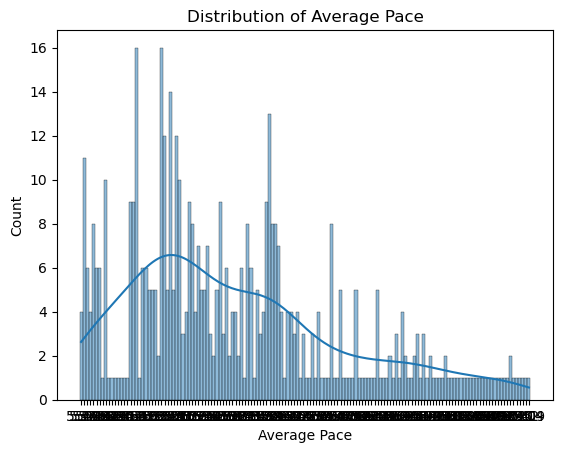

In [6]:
sns.histplot(dataframe['Average Pace'], bins=20, kde=True)
plt.title('Distribution of Average Pace')
plt.xlabel('Average Pace')
plt.ylabel('Count')
plt.show()

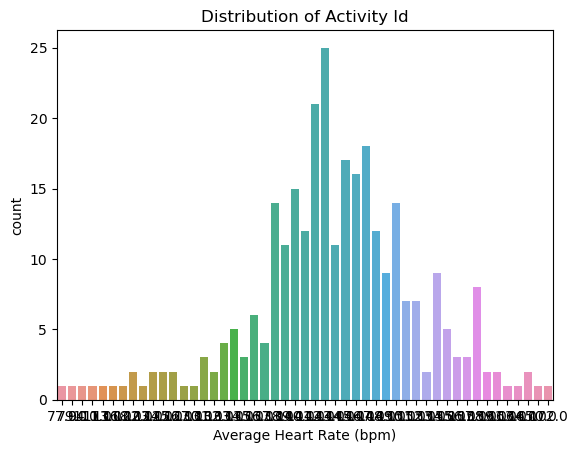

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


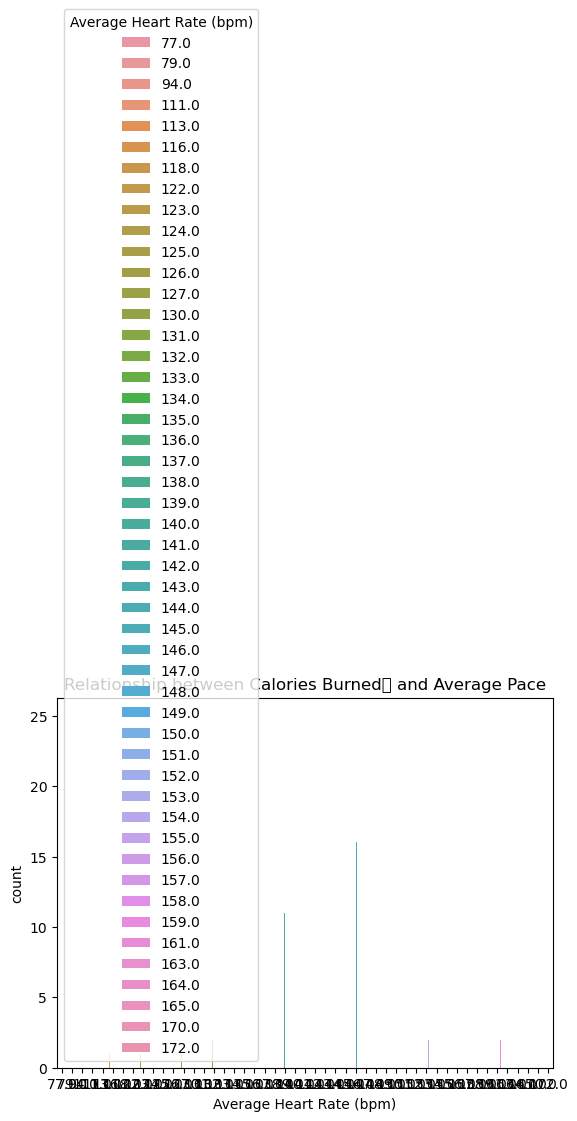

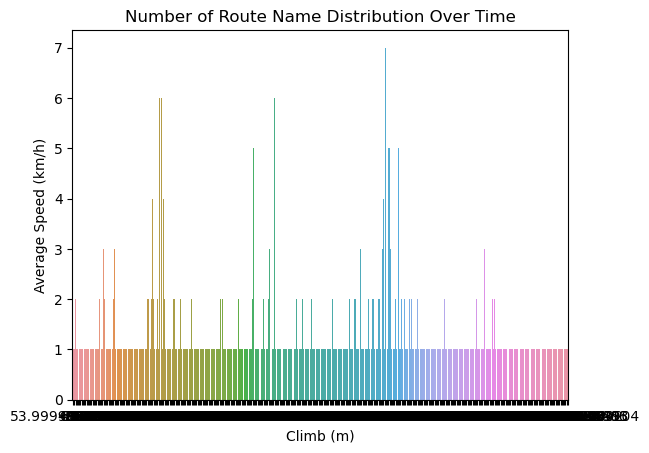

In [7]:
# Visualize the distribution of 'cardioActivities'
sns.countplot(x='Average Heart Rate (bpm)', data=dataframe)
plt.title('Distribution of Activity Id')
plt.show()

# Visualize the relationship between 'average pace' and 'Model Year'
sns.countplot(x='Average Heart Rate (bpm)', hue='Average Heart Rate (bpm)', data=dataframe)
plt.title('Relationship between Calories Burned	 and Average Pace')
plt.show()

# Visualize the distribution of 'Number of Calories Burned   distribution'
sns.countplot(x='Calories Burned', data=dataframe)
plt.title('Number of Route Name Distribution Over Time')
plt.xlabel('Climb (m)')
plt.ylabel('Average Speed (km/h)')
plt.show()


#### draw conculsion for cardioActivities

Cardiovascular activities, also known as cardio exercises, are fantastic for your heart and overall health. Engaging in activities like running, cycling, swimming, or dancing gets your heart rate up, improving circulation and increasing oxygen flow throughout your body. This type of exercise strengthens your heart, lowers blood pressure, and can reduce the risk of chronic diseases like heart disease and diabetes. Plus, it's a great way to manage weight, boost mood, and improve sleep quality. Overall, including cardio in your routine is a fantastic way to keep your heart and body happy and healthy!